# Final Exam

## Congratulations, fellow, for making it this far!

We'd like to assess your knowledge on data science and machine learning after 10 weeks of project-based learning. See how far you've come by answering the questions below.

__Instructions:__
1. Execute all codes in this notebook before submission. You may add more cells should you require it, but do not rearrange the questions.
2. Place all write-ups in their respective markdown cells.
3. Submit this notebook with your answers to the LMS by Saturday 9PM.

### Part 1. Heart Disease 

Import heart.csv as the data set for this part.

__Features:__

> 1. `age` - age in years 
2. `sex` - (1 = male; 0 = female) 
3. `cp` - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. `trestbps` - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. `chol` - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. `restecg` - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. `thalach` - maximum heart rate achieved 
9. `exang` - exercise induced angina (1 = yes; 0 = no) 
10. `oldpeak` - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. `slope` - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. `ca` - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. `thal` - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

1. Conduct an in-depth exploratory data analysis of the heart data set.

In [867]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

In [868]:
df = pd.read_csv(r'C:\Users\William\Downloads\heart-1.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [869]:
df = df[df['age'].notna()]

In [870]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
301,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
302,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
303,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [871]:
df.describe().T

,count,unique,top,freq
age,304,42,58,19
sex,304,3,1,207
cp,304,5,0,143
trestbps,304,50,120,37
chol,304,153,234,6
fbs,304,3,0,258
restecg,304,4,1,152
thalach,304,92,162,11
exang,304,3,0,204
oldpeak,304,41,0,99


In [872]:
df.shape

(304, 14)

In [873]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [874]:
df.dtypes

age         object
sex         object
cp          object
trestbps    object
chol        object
fbs         object
restecg     object
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
target      object
dtype: object

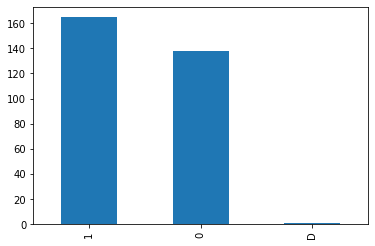

In [875]:
target10 = df['target'].value_counts().plot(kind='bar')

### ESKWELABS SOLID!
### Sneaky

In [876]:
df.loc[df['target'] == 'D']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
37,E,S,K,W,E,L,A,B,S,S,O,L,I,D


# No wonder there was a D at first. :(

In [877]:
df[36:37]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
37,E,S,K,W,E,L,A,B,S,S,O,L,I,D


In [878]:
df.loc[37]

age         E
sex         S
cp          K
trestbps    W
chol        E
fbs         L
restecg     A
thalach     B
exang       S
oldpeak     S
slope       O
ca          L
thal        I
target      D
Name: 37, dtype: object

In [879]:
df.shape

(304, 14)

In [880]:
df = df[df.age != 'E'].reset_index(drop=True)

In [881]:
df.shape

(303, 14)

In [882]:
df.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [883]:
df.loc[37]

age          54
sex           1
cp            2
trestbps    150
chol        232
fbs           0
restecg       0
thalach     165
exang         0
oldpeak     1.6
slope         2
ca            0
thal          3
target        1
Name: 37, dtype: object

In [884]:
df.shape

(303, 14)

In [885]:
df.describe().T

,count,unique,top,freq
age,303,41,58,19
sex,303,2,1,207
cp,303,4,0,143
trestbps,303,49,120,37
chol,303,152,197,6
fbs,303,2,0,258
restecg,303,3,1,152
thalach,303,91,162,11
exang,303,2,0,204
oldpeak,303,40,0,99


In [886]:
df.dtypes

age         object
sex         object
cp          object
trestbps    object
chol        object
fbs         object
restecg     object
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
target      object
dtype: object

In [887]:
columns = list(df.columns)

In [888]:
columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [889]:
for col in [columns]:
    df[col] = df[col].astype(float)

In [890]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object

In [891]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [892]:
df_named = df.copy()

In [893]:
df_named

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [894]:
df_named.loc[df['sex'] == 1, 'sex'] = 'Male'
df_named.loc[df['sex'] == 0, 'sex'] = 'Female'
df_named.loc[df['target'] == 1, 'target'] = 'With disease'
df_named.loc[df['target'] == 0, 'target'] = 'No Disease'
df_named.loc[df['cp'] == 0, 'cp'] = 'Typical angina'
df_named.loc[df['cp'] == 1, 'cp'] = 'Atypical angina'
df_named.loc[df['cp'] == 2, 'cp'] = 'Non-anginal pain'
df_named.loc[df['cp'] == 3, 'cp'] = 'Asymptomatic'
df_named.loc[df['slope'] == 0, 'slope'] = 'Uplsoping'
df_named.loc[df['slope'] == 1, 'slope'] = 'Flatsloping'
df_named.loc[df['slope'] == 2, 'slope'] = 'Downsloping'
df_named.loc[df['thal'] == 1, 'thal'] = 'Normal'
df_named.loc[df['thal'] == 2, 'thal'] = 'Normal'
df_named.loc[df['thal'] == 3, 'thal'] = 'Normal'
df_named.loc[df['thal'] == 6, 'thal'] = 'Fixed defect'
df_named.loc[df['thal'] == 7, 'thal'] = 'reversable defect'
df_named.loc[df['chol'] > 200, 'chol'] = 'High'
df_named.loc[df['age'] > 50, 'age'] = 'Old'

In [895]:
df_named

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,Old,Male,Asymptomatic,145.0,High,1.0,0.0,150.0,0.0,2.3,Uplsoping,0.0,Normal,With disease
1,37,Male,Non-anginal pain,130.0,High,0.0,1.0,187.0,0.0,3.5,Uplsoping,0.0,Normal,With disease
2,41,Female,Atypical angina,130.0,High,0.0,0.0,172.0,0.0,1.4,Downsloping,0.0,Normal,With disease
3,Old,Male,Atypical angina,120.0,High,0.0,1.0,178.0,0.0,0.8,Downsloping,0.0,Normal,With disease
4,Old,Female,Typical angina,120.0,High,0.0,1.0,163.0,1.0,0.6,Downsloping,0.0,Normal,With disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,Old,Female,Typical angina,140.0,High,0.0,1.0,123.0,1.0,0.2,Flatsloping,0.0,Normal,No Disease
299,45,Male,Asymptomatic,110.0,High,0.0,1.0,132.0,0.0,1.2,Flatsloping,0.0,Normal,No Disease
300,Old,Male,Typical angina,144.0,193,1.0,1.0,141.0,0.0,3.4,Flatsloping,2.0,Normal,No Disease
301,Old,Male,Typical angina,130.0,131,0.0,1.0,115.0,1.0,1.2,Flatsloping,1.0,Normal,No Disease


[Text(0, 0, 'With Disease'), Text(1, 0, 'No Disease')]

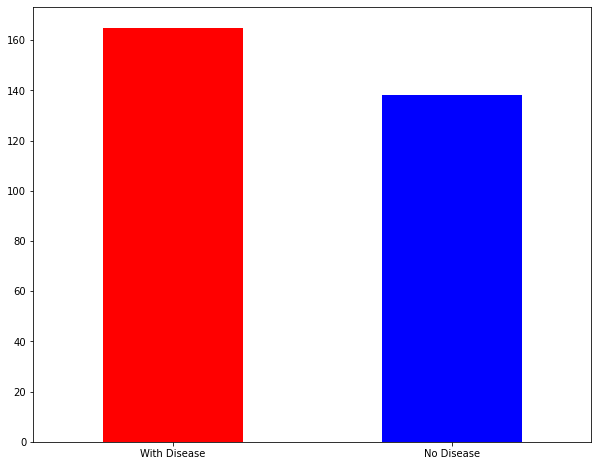

In [896]:
target10 = df['target'].value_counts().plot(color=['red','blue'],kind='bar',figsize=(10,8))
target10.set_xticklabels(('With Disease','No Disease'), rotation=0)

Text(0.5, 0, '')

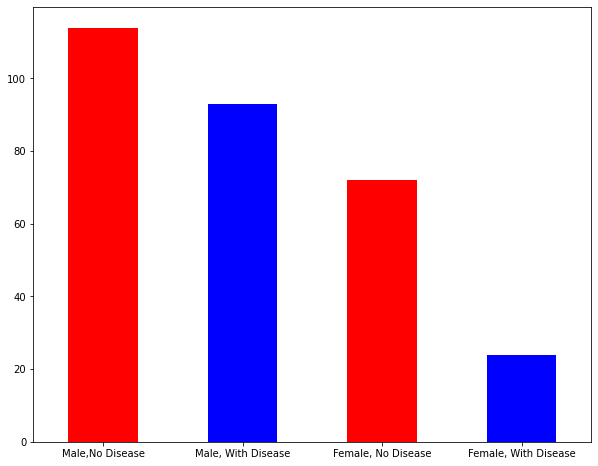

In [897]:
sextarget10 = df.value_counts(['sex','target']).plot(color=['red','blue'],kind='bar',figsize=(10,8))
sextarget10.set_xticklabels(('Male,No Disease','Male, With Disease','Female, No Disease','Female, With Disease'), rotation=0)
plt.xlabel('')

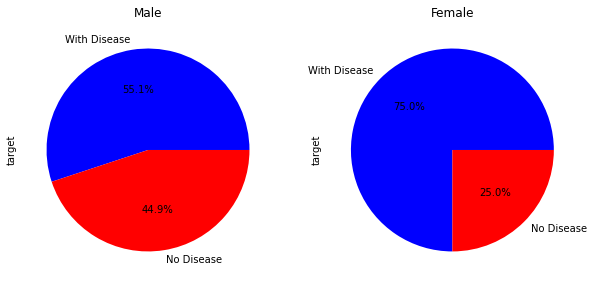

In [898]:
f,ax=plt.subplots(1,2)
labels = 'With Disease','No Disease'
df.loc[df['sex']==1, 'target'].value_counts().plot.pie(colors = ['blue','red'], labels = labels ,autopct='%1.1f%%',ax=ax[0],figsize=(10,8))
df.loc[df['sex']==0, 'target'].value_counts().plot.pie(colors = ['blue','red'], labels = labels, autopct='%1.1f%%',ax=ax[1],figsize=(10,8))
ax[0].set_title('Male')
ax[1].set_title('Female')

plt.show()

In [899]:
pd.crosstab(df['cp'], df['target']).style.background_gradient(cmap='rainbow')

target,0.0,1.0
cp,,
0.0,104,39
1.0,9,41
2.0,18,69
3.0,7,16


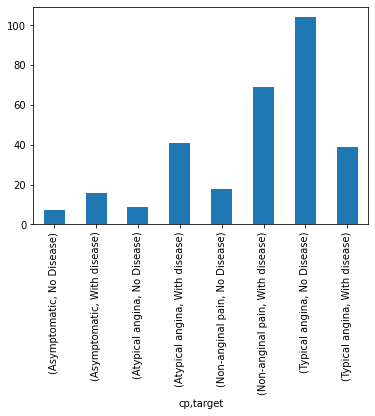

In [900]:
cptype10 = df_named.value_counts(['cp','target']).sort_index().plot(kind='bar')

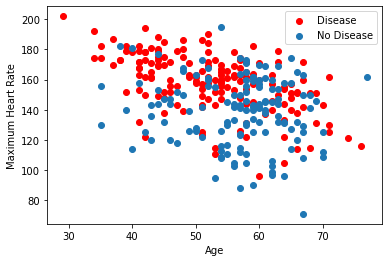

In [901]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

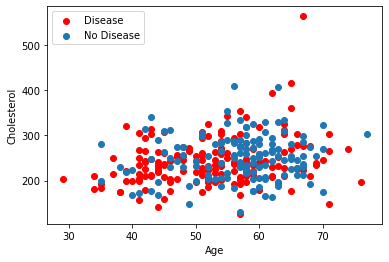

In [902]:
plt.scatter(x=df.age[df.target==1], y=df.chol[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.chol[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

Text(0.5, 0, '')

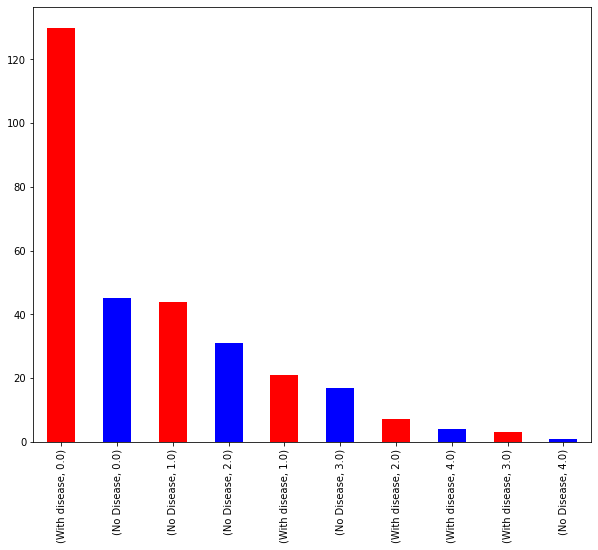

In [903]:
sextarget10 = df_named.value_counts(['target','ca']).plot(color=['red','blue'],kind='bar',figsize=(10,8))
plt.xlabel('')

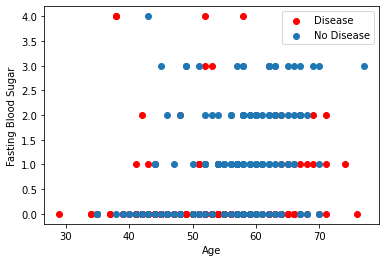

In [904]:
plt.scatter(x=df.age[df.target==1], y=df.ca[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.ca[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Fasting Blood Sugar")
plt.show()

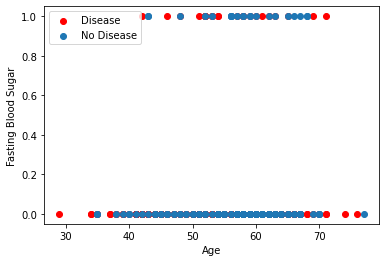

In [905]:
plt.scatter(x=df.age[df.target==1], y=df.fbs[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.fbs[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Fasting Blood Sugar")
plt.show()

2. Write-up of your process for EDA

(Edit this markdown to type in your answer)

3. Implement a model to classify whether the patient has heart disease or not. Try to achieve an overall accuracy score above 90%.

In [906]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [907]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [908]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


# Model used as old age greater than 50 based on the plot

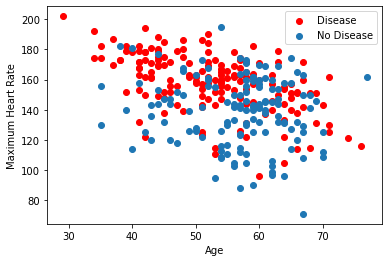

In [909]:
#Model used as old age greater than 50 based on the plot
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [910]:
X = df.iloc[:,:-1].values
y = df.iloc[:,13].values

In [911]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.30, random_state= 42)

In [912]:
#Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print('Logistic Regression :')
print('Accuracy = ', accuracy)
print('Mean Squared Error:',mse)
print('R score:',r)
print('Mean Absolute Error:',mae)

Logistic Regression :
Accuracy =  0.8131868131868132
Mean Squared Error: 0.18681318681318682
R score: 0.24536585365853647
Mean Absolute Error: 0.18681318681318682


<AxesSubplot:>

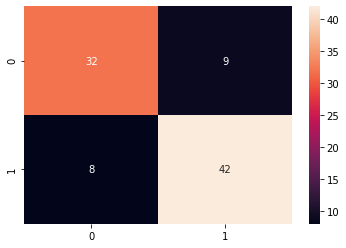

In [913]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm, annot=True)

In [914]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [915]:
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.84


In [916]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.85


In [917]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.87


[[35  6]
 [ 6 44]]


<AxesSubplot:>

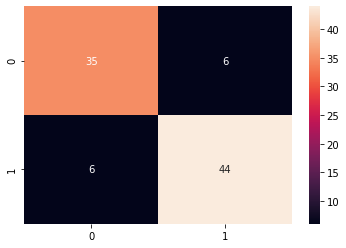

In [918]:
#Use n_neighbors = 7
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

# Model used with Old Age, High cholesterol, Unhealthy heart

### For fun, probably overfitting

In [919]:
df.loc[((df['age'] > 50) | (df['chol'] > 200) | (df['slope'] == 2)), 'Old Age, High cholesterol, Unhealthy heart'] = 1 
df['Old Age, High cholesterol, Unhealthy heart'] = df['Old Age, High cholesterol, Unhealthy heart'].fillna(0)

In [920]:
X = df.iloc[:,:-1].values
y = df.iloc[:,14].values

In [921]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.30, random_state= 42)

In [922]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print('Logistic Regression :')
print('Accuracy = ', accuracy)
print('Mean Squared Error:',mse)
print('R score:',r)
print('Mean Absolute Error:',mae)

Logistic Regression :
Accuracy =  0.978021978021978
Mean Squared Error: 0.02197802197802198
R score: -1.0222222222222235
Mean Absolute Error: 0.02197802197802198


<AxesSubplot:>

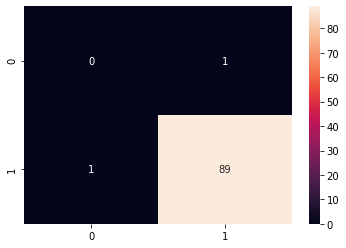

In [923]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm, annot=True)

In [924]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.30, random_state= 42)

In [925]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [926]:
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 1.00


In [927]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.99


In [928]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.99


In [929]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  1]
 [ 0 90]]


<AxesSubplot:>

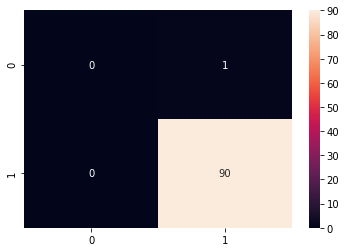

In [930]:
sns.heatmap(cm, annot=True)

4. Write-up of your process for ML 

EDA really did help when it comes to visualizing patters, in this case I first tried considering age as the only factor and it was able to have an accuracy of almost 90, but even if I am not a doctor, I would say age shouldn't be the only factor to consider, so I played around with it and decided to take the conditions of old age, unhealthy heart, and high cholesterol levels for fun and I'm sure that the model would classify those as having the disease.

As for the models chosen, I went for the simpler ones which are linear regression and KNN cause as mentioned from the bootcamp, you don't necessarily need to execute the most complicated models, as long as a simple model works, it should be fine, and that statement has been said by a lot of data scientists that I was able to listen to in the past.

5. What conclusions can you make from your exploratory data analysis and classification?

Visualizing is very important as it gives you ideas on what factors you could consider, the difficult thing is probably looking for the right questions to ask and at the same time answer that with feature engineering and data visualization, this actually made me realize that it is important to visualize and not just see it written in a dataframe. For classification, using the simpler models could actually be beneficial, starting from there would already give you a good starting point.

### Part 2. Apache Spark

6. What are the advantages and disadvantages of using Spark on Databricks over Python in Jupyter? Provide three use cases where Spark would be more beneficial.

The advantages of spark is speed because of memory optimization, it is also very easy to use and could integrate multiple languages as our experience in using databricks, it could also compute in the cloud where our computers don't necessarily have the resources.

1. Big Data Handling - Because of the speed advantage through optimized computing, it is a great choice for handling big data. With additional filetypes such as parquet file, it is theoretically faster if paired with efficient filetypes such as parquet.

2. Machine learning - Spark has a very power machine learning algorithim for big data, those tools being integrated in spark lessens the need for third party tools. With the machine learning algorithms integrated with it, different industries could benefit those tools, those include recommendation engines such as netflix and spotify, e-commerce applications, and from our experience, the financial institution where we classified fraudulent transactions which could take a very long process if used with conventional tools and by our personal computer.

3. Streaming Data - Spark has the ability to process streaming data, and this could be a powerful tool to analyze real time data with the industries mentioned above.





### Part 3. Recommender Systems

7. How would you create a recommender system for an e-commerce website? What approach/es would you select? What evaluation method/s will you use to assess its performance?

Segmentation of customers would be a great first step, we could classify them as new customers, returning customers and loyal customers and pair their purchases on what type of customer they are. Clustering those customers and purchases with market basket analysis could verify those clusters with the help of the values of support, confidence and lift.

(Edit this markdown to type in your answer)



### Part 4. NLP

8. In the sentence ‘Cohort five is super amazing!’, what is the complete name for the detailed part of speech tag and syntactic dependency of the word ‘super’?

In [931]:
import sys
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy import displacy
cohortv = nlp(u"Cohort five is super amazing!")

for token in cohortv:
    print(token.text, token.pos_, token.tag_)

Cohort NOUN NN
five NUM CD
is AUX VBZ
super ADV RB
amazing ADJ JJ
! PUNCT .


In [932]:
from spacy import displacy
displacy.render(cohortv, style='dep', jupyter=True, options={'distance':150})

The word super is an adverb  and it's dependency is an adjective which is the word "amazing"